# Projeto Previsão de Inadimplência 

## Coleta de Dados

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Criar dataframe com o dataset
df = pd.read_csv('C:/Users/patri/GitHub/Projetos/Projeto_Loan Default/dataset/Loan_default.csv')

## Descrição dos Dados

- **ID_Emprestimo**: Identificador do empréstimo.
- **Idade**: Idade do mutuário.
- **Renda**: Renda anual do mutuário.
- **Valor_Emprestimo**: Valor do dinheiro emprestado.
- **Pontuacao_Credito**: Pontuação de crédito do mutuário, que indica sua confiabilidade financeira.
- **Meses_Empregado**: Número de meses em que o mutuário esteve empregado.
- **NumLinhasCredito**: Número de linhas de crédito abertas pelo mutuário.
- **Taxa_Juros**: Taxa de juros aplicada ao empréstimo.
- **Prazo_Emprestimo**: Prazo do empréstimo em meses.
- **Relação_Divida_Renda**: Relação dívida-renda, indicando a proporção da dívida em relação à renda.
- **Educacao**: Nível educacional mais alto alcançado pelo mutuário (ex.: Doutorado, Mestrado, Graduação, Ensino Médio).
- **Tipo_Emprego**: Tipo de status de emprego do mutuário (ex.: Integral, Meio Período, Autônomo, Desempregado).
- **Estado_Civil**: Estado civil do mutuário (ex.: Solteiro, Casado, Divorciado).
- **Tem_Hipoteca**: Indica se o mutuário possui hipoteca (Sim ou Não).
- **Tem_Dependentes**: Indica se o mutuário tem dependentes (Sim ou Não).
- **Finalidade_Emprestimo**: Finalidade do empréstimo (ex.: Imóvel, Automóvel, Educação, Negócios, Outro).
- **Tem_CoAssinante**: Indica se o empréstimo possui um co-assinante (Sim ou Não).
- **Inadimplencia**: Variável binária que indica se o empréstimo entrou em inadimplência (1 = Sim, 0 = Não).

## Análise Exploratória

In [3]:
# Exibir primeiras linhas
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
# Renomear colunas
df.rename(columns={ 
    'LoanID': 'ID_Emprestimo',
    'Age': 'Idade',
    'Income': 'Renda',
    'LoanAmount': 'Valor_Emprestimo',
    'CreditScore': 'Pontuacao_Credito',
    'MonthsEmployed': 'Meses_Empleo',
    'NumCreditLines': 'NumLinhasCredito',
    'InterestRate': 'Taxa_Juros',
    'LoanTerm': 'Prazo_Emprestimo',
    'DTIRatio': 'Relacao_Divida_Renda',
    'Education': 'Educacao',
    'EmploymentType': 'Tipo_Emprego',
    'MaritalStatus': 'Estado_Civil',
    'HasMortgage': 'Tem_Hipoteca',
    'HasDependents': 'Tem_Dependentes',
    'LoanPurpose': 'Finalidade_Emprestimo',
    'HasCoSigner': 'Tem_CoAssinante',
    'Default': 'Inadimplencia'
}, inplace=True)

In [5]:
# Renomear cada informação dos dados categóricos
df['Educacao'] = df['Educacao'].replace({
    "Bachelor's": 'Graduação',
    "Master's": 'Mestrado',
    'High School': 'Ensino Médio',
    'PhD': 'Doutorado'
})
df['Tipo_Emprego'] = df['Tipo_Emprego'].replace({
    'Full-time': 'Integral',
    'Unemployed': 'Desempregado',
    'Self-employed': 'Autônomo',
    'Part-time': 'Meio Período'
})
df['Estado_Civil'] = df['Estado_Civil'].replace({
    'Divorced': 'Divorciado',
    'Married': 'Casado',
    'Single': 'Solteiro'
})
df['Tem_Hipoteca'] = df['Tem_Hipoteca'].replace({
    'Yes': 'Sim',
    'No': 'Não'
})
df['Tem_Dependentes'] = df['Tem_Dependentes'].replace({
    'Yes': 'Sim',
    'No': 'Não'
})
df['Finalidade_Emprestimo'] = df['Finalidade_Emprestimo'].replace({
    'Other': 'Outro',
    'Auto': 'Automóvel',
    'Business': 'Negócios',
    'Home': 'Imóvel',
    'Education': 'Educação'
})
df['Tem_CoAssinante'] = df['Tem_CoAssinante'].replace({
    'Yes': 'Sim',
    'No': 'Não'
})

# Exibir novo formato do dataframe
df.head()

,ID_Emprestimo,Idade,Renda,Valor_Emprestimo,Pontuacao_Credito,Meses_Empleo,NumLinhasCredito,Taxa_Juros,Prazo_Emprestimo,Relacao_Divida_Renda,Educacao,Tipo_Emprego,Estado_Civil,Tem_Hipoteca,Tem_Dependentes,Finalidade_Emprestimo,Tem_CoAssinante,Inadimplencia
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Graduação,Integral,Divorciado,Sim,Sim,Outro,Sim,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Mestrado,Integral,Casado,Não,Não,Outro,Sim,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Mestrado,Desempregado,Divorciado,Sim,Sim,Automóvel,Não,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,Ensino Médio,Integral,Casado,Não,Não,Negócios,Não,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Graduação,Desempregado,Divorciado,Não,Sim,Automóvel,Não,0


In [6]:
# Exibir informações relevantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Emprestimo          255347 non-null  object 
 1   Idade                  255347 non-null  int64  
 2   Renda                  255347 non-null  int64  
 3   Valor_Emprestimo       255347 non-null  int64  
 4   Pontuacao_Credito      255347 non-null  int64  
 5   Meses_Empleo           255347 non-null  int64  
 6   NumLinhasCredito       255347 non-null  int64  
 7   Taxa_Juros             255347 non-null  float64
 8   Prazo_Emprestimo       255347 non-null  int64  
 9   Relacao_Divida_Renda   255347 non-null  float64
 10  Educacao               255347 non-null  object 
 11  Tipo_Emprego           255347 non-null  object 
 12  Estado_Civil           255347 non-null  object 
 13  Tem_Hipoteca           255347 non-null  object 
 14  Tem_Dependentes        255347 non-nu

In [7]:
# Separar variáveis categoricas
df_categoricas = df.select_dtypes(exclude=['number'])

# Separar variáveis numéricas
df_numericas = df.select_dtypes(include=['number'])

In [8]:
# Exibir valores nulos de cada dataframe
display(df_categoricas.isna().sum())
display(df_numericas.isna().sum())

ID_Emprestimo            0
Educacao                 0
Tipo_Emprego             0
Estado_Civil             0
Tem_Hipoteca             0
Tem_Dependentes          0
Finalidade_Emprestimo    0
Tem_CoAssinante          0
dtype: int64

Idade                   0
Renda                   0
Valor_Emprestimo        0
Pontuacao_Credito       0
Meses_Empleo            0
NumLinhasCredito        0
Taxa_Juros              0
Prazo_Emprestimo        0
Relacao_Divida_Renda    0
Inadimplencia           0
dtype: int64

In [9]:
# Exibir tipos de dados de ambas as variáveis
display(df_categoricas.dtypes)
display(df_numericas.dtypes)

ID_Emprestimo            object
Educacao                 object
Tipo_Emprego             object
Estado_Civil             object
Tem_Hipoteca             object
Tem_Dependentes          object
Finalidade_Emprestimo    object
Tem_CoAssinante          object
dtype: object

Idade                     int64
Renda                     int64
Valor_Emprestimo          int64
Pontuacao_Credito         int64
Meses_Empleo              int64
NumLinhasCredito          int64
Taxa_Juros              float64
Prazo_Emprestimo          int64
Relacao_Divida_Renda    float64
Inadimplencia             int64
dtype: object

In [10]:
# Métricas importantes das variáveis numéricas
df_numericas.describe().round(2)

,Idade,Renda,Valor_Emprestimo,Pontuacao_Credito,Meses_Empleo,NumLinhasCredito,Taxa_Juros,Prazo_Emprestimo,Relacao_Divida_Renda,Inadimplencia
count,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00
mean,43.50,82499.30,127578.87,574.26,59.54,2.50,13.49,36.03,0.50,0.12
std,14.99,38963.01,70840.71,158.90,34.64,1.12,6.64,16.97,0.23,0.32
min,18.00,15000.00,5000.00,300.00,0.00,1.00,2.00,12.00,0.10,0.00
25%,31.00,48825.50,66156.00,437.00,30.00,2.00,7.77,24.00,0.30,0.00
50%,43.00,82466.00,127556.00,574.00,60.00,2.00,13.46,36.00,0.50,0.00
75%,56.00,116219.00,188985.00,712.00,90.00,3.00,19.25,48.00,0.70,0.00
max,69.00,149999.00,249999.00,849.00,119.00,4.00,25.00,60.00,0.90,1.00


In [11]:
# Criar coluna de faixa etária
bins = [0, 29, 45, 59, 100]
labels = ['Menos de 30', '30 a 45', '46 a 60', 'Mais de 60']
df_categoricas['Faixa_etaria'] = pd.cut(df_numericas['Idade'], bins=bins, labels=labels)

# Criar faixa salarial
bins = [0, 25000, 50000, 75000, 100000, 1000000]
labels = ['Até 25K', 'De 25K a 50K', 'De 50K a 75K', 'De 75K a 100K', 'Mais de 100K']
df_categoricas['Faixa_salarial'] = pd.cut(df_numericas['Renda'], bins=bins, labels=labels)

In [12]:
# Criar dataframe apenas com as variáveis binárias
df_binarias = df_categoricas[['Tem_Hipoteca', 'Tem_Dependentes', 'Tem_CoAssinante']].copy()
df_binarias['Inadimplencia'] = df_numericas['Inadimplencia']
df_categoricas = df_categoricas.drop(['ID_Emprestimo', 'Tem_Hipoteca', 'Tem_Dependentes', 'Tem_CoAssinante'], axis=1)

In [13]:
# Função para criar gráficos de coluna de cada variável categórica
def graficos_contagem(df, colunas, rotacao=45, num_cols=2):
    # Calcular o número de linhas com base no número de colunas, arredondando para cima
    num_rows = -(-len(colunas) // num_cols)  # Arredonda para cima

    # Criar o layout de subgráficos com o número adequado de linhas e colunas
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 4 * num_rows))
    axes = np.array(axes).flatten()  # Garante que axes seja um array unidimensional para facilitar o acesso

    # Criar um gráfico de contagem para cada coluna
    for ax, coluna in zip(axes, colunas):
        # Criar o gráfico de contagem usando seaborn
        sns.countplot(data=df, x=coluna, ax=ax, edgecolor='black')
        ax.set_title(f'Contagem por {coluna}', fontsize=12)  # Definir título do gráfico
        ax.set_xlabel(coluna)  # Definir rótulo do eixo X
        ax.set_ylabel('Contagem')  # Definir rótulo do eixo Y
        ax.tick_params(axis='x', rotation=rotacao)  # Ajustar a rotação dos rótulos do eixo X

        # Adicionar rótulos de dados em cada barra
        for p in ax.patches:
            ax.text(
                p.get_x() + p.get_width() / 2,  # Posicionar no centro da barra
                p.get_height() + 0.02,         # Posicionar acima da barra
                f'{int(p.get_height())}',      # Exibir a contagem
                ha='center', 
                va='bottom', 
                fontsize=10, 
                color='black', 
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')  # Caixa de texto para rótulo
            )

    # Remover subgráficos extras caso o número de gráficos não seja um múltiplo de num_cols
    for ax in axes[len(colunas):]:  
        ax.remove()  # Remove os subgráficos vazios

    # Ajustar o layout para evitar sobreposição de elementos
    plt.tight_layout()
    plt.show()

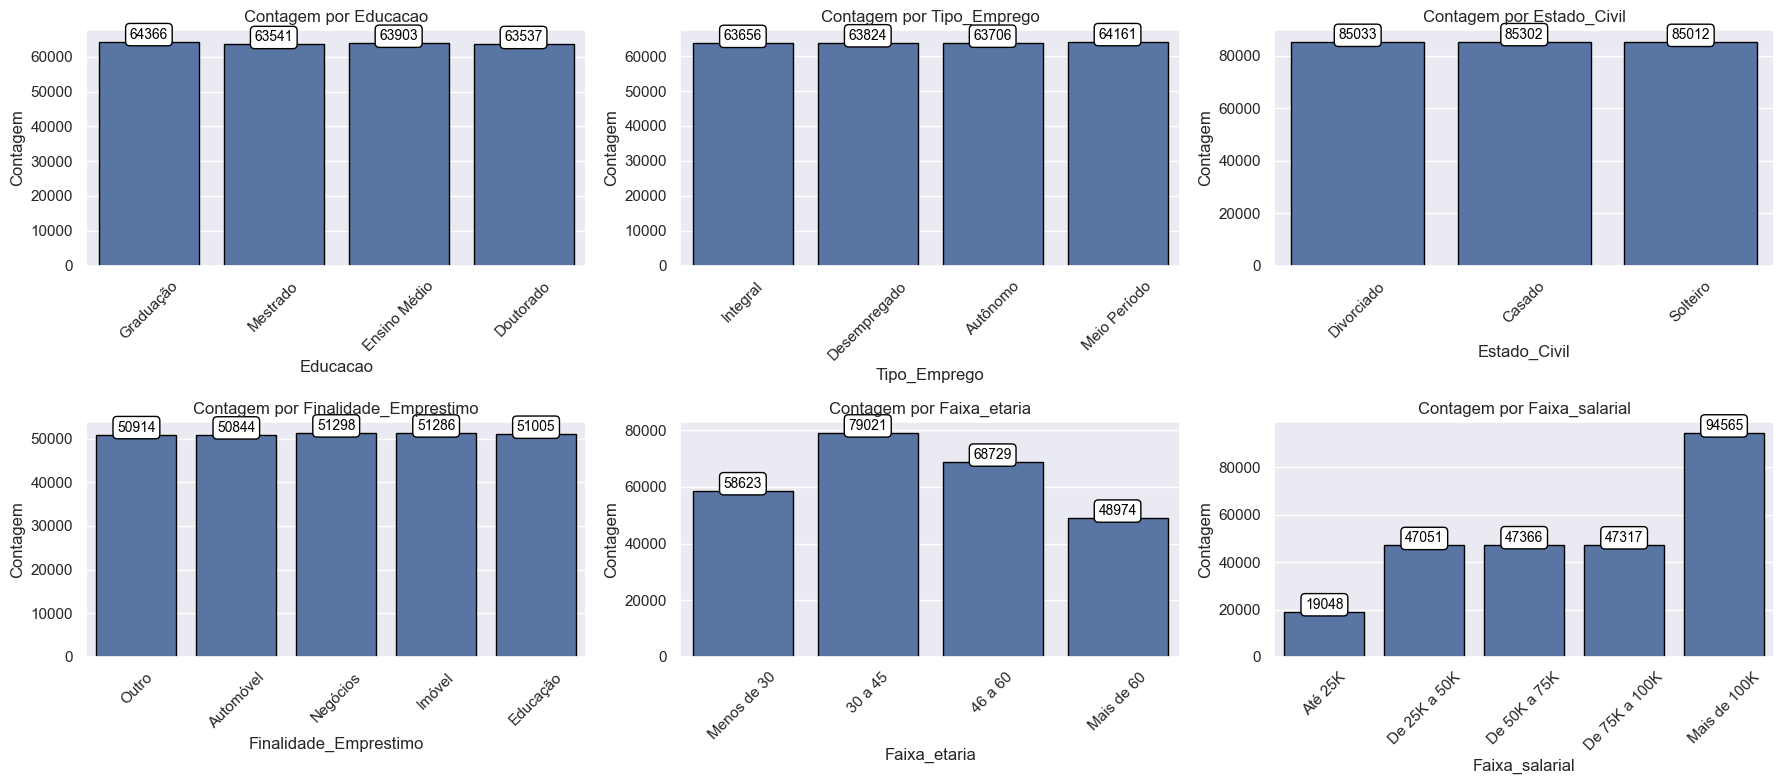

In [14]:
# Definir colunas e usar a função para gerar gráficos para cada coluna categórica
colunas = df_categoricas.columns
graficos_contagem(df_categoricas, colunas, rotacao=45, num_cols=3) 

In [15]:
# Criar função para criar gráficos de pizza de cada variável binária
def graficos_pizza(df, colunas, num_cols=2):
    # Calcular o número de linhas com base no número de colunas, arredondando para cima
    num_rows = -(-len(colunas) // num_cols)  # Arredonda para cima

    # Criar o layout de subgráficos com o número adequado de linhas e colunas
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 5 * num_rows))
    axes = np.array(axes).flatten()  # Garante que axes seja um array unidimensional para facilitar o acesso

    # Criar um gráfico de pizza para cada coluna
    for ax, coluna in zip(axes, colunas):
        # Calcular as proporções para cada categoria da coluna
        valores = df[coluna].value_counts()
        
        # Criar o gráfico de pizza com as proporções calculadas
        ax.pie(valores, labels=valores.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
        ax.set_title(coluna)  # Definir título do gráfico
        ax.axis('equal')  # Garantir que o gráfico tenha forma circular

    # Remover subgráficos extras caso o número de gráficos não seja um múltiplo de num_cols
    for ax in axes[len(colunas):]:  
        ax.remove()  # Remove os subgráficos vazios

    # Ajustar o layout para evitar sobreposição de elementos
    plt.tight_layout()
    plt.show()

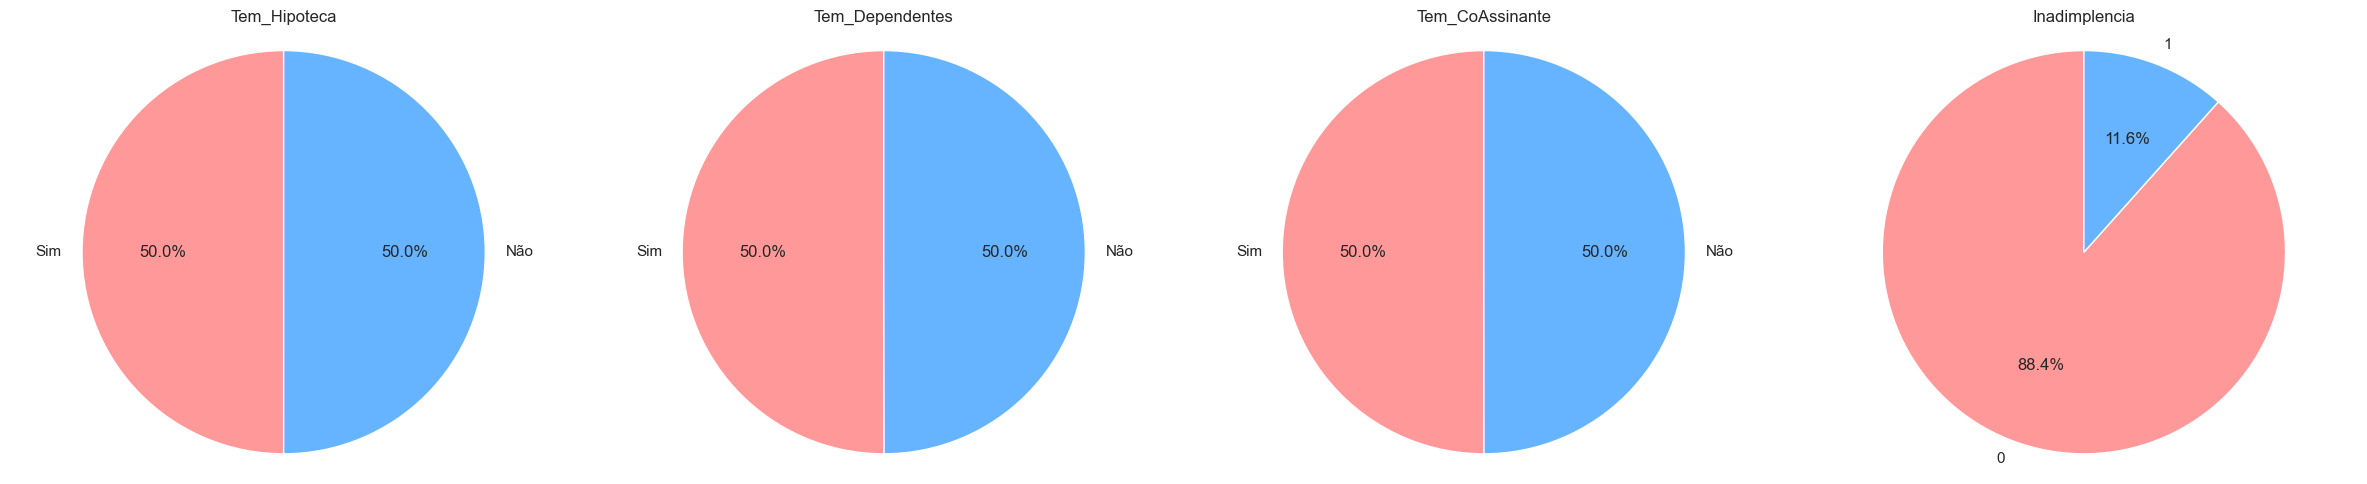

In [16]:
# Definir colunas e usar a função para gerar gráficos para cada variável
colunas = df_binarias.columns
graficos_pizza(df_binarias, colunas, num_cols=4)

In [17]:
# Criar função para criar histogramas para cada variável numérica
def graficos_histogramas(df, colunas, bins=10, rotacao=45, num_cols=2):
    # Calcular o número de linhas com base no número de colunas, arredondando para cima
    num_rows = -(-len(colunas) // num_cols)  # Arredonda para cima

    # Criar o layout de subgráficos com o número adequado de linhas e colunas
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 4 * num_rows))
    axes = np.array(axes).flatten()  # Garante que axes seja um array unidimensional para facilitar o acesso

    # Criar um histograma para cada coluna
    for ax, coluna in zip(axes, colunas):
        # Gerar o histograma com KDE para cada coluna
        sns.histplot(df[coluna], bins=bins, ax=ax, kde=True)
        ax.set_title(f'Distribuição de {coluna}', fontsize=12)  # Definir título do gráfico
        ax.set_xlabel(coluna)  # Definir rótulo do eixo X
        ax.set_ylabel('Frequência')  # Definir rótulo do eixo Y
        ax.tick_params(axis='x', rotation=rotacao)  # Ajustar a rotação dos rótulos do eixo X

    # Remover subgráficos extras se o número de gráficos não for um múltiplo de num_cols
    for ax in axes[len(colunas):]:  
        ax.remove()  # Remove os subgráficos vazios

    # Ajustar o layout para evitar sobreposição de elementos
    plt.tight_layout()
    plt.show()

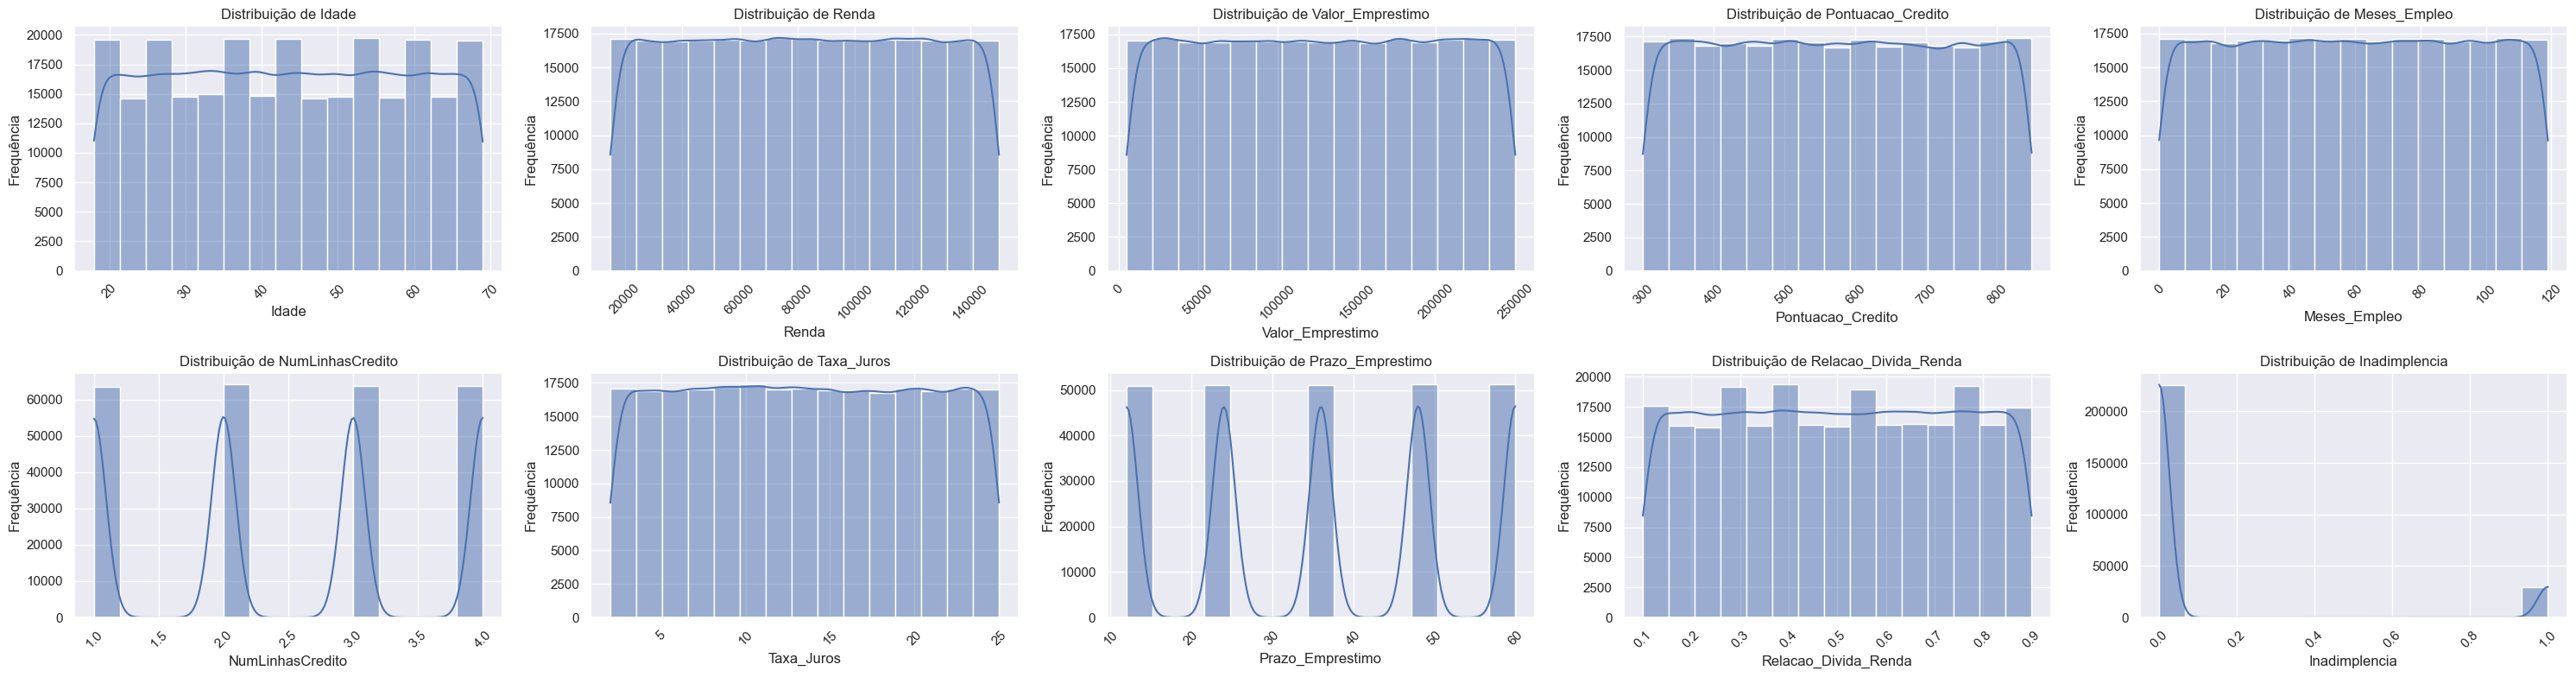

In [18]:
# Definir colunas e usar a função para gerar gráficos para cada variável
colunas = df_numericas.columns
graficos_histogramas(df_numericas, colunas, bins=15, rotacao=45, num_cols=5)

In [19]:
# Criar função para criar boxplots para cada variável contínua
def graficos_boxplot(df, colunas, colunas_categoria=None, num_cols=2):
    # Calcular o número de linhas com base no número de colunas
    num_rows = -(-len(colunas) // num_cols)  # Arredonda para cima

    # Criar o layout de subgráficos
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 4 * num_rows))
    axes = np.array(axes).flatten()  # Garante que axes seja um array unidimensional

    # Criar um boxplot para cada coluna
    for ax, coluna in zip(axes, colunas):
        if colunas_categoria:
            # Boxplot com categoria
            sns.boxplot(data=df, x=colunas_categoria, y=coluna, ax=ax)
            ax.set_title(f'Boxplot: {coluna} por {colunas_categoria}')
        else:
            # Boxplot sem categoria
            sns.boxplot(data=df, x=coluna, ax=ax)
            ax.set_title(f'Boxplot: {coluna}')
        ax.set_xlabel(coluna)
        ax.set_ylabel('Valor')

    # Remover subplots extras caso o número de gráficos não seja múltiplo de num_cols
    for ax in axes[len(colunas):]:  
        ax.remove()

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

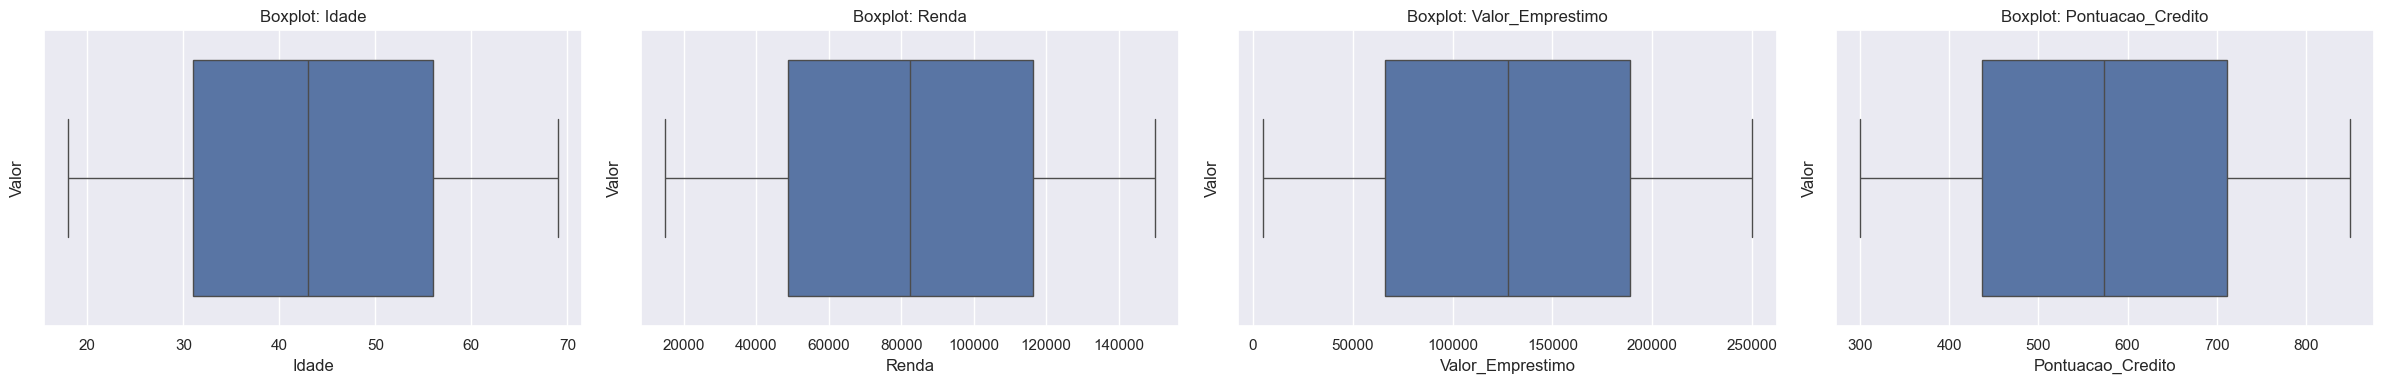

In [20]:
# Definir variáveis contínuas
df_continuas = df_numericas[['Idade', 'Renda', 'Valor_Emprestimo', 'Pontuacao_Credito']]

# Definir colunas e usar a função para gerar os boxplots das variáveis 
colunas = df_continuas.columns
graficos_boxplot(df_continuas, colunas, num_cols=4)

### Verificar multicolinearidade e correlação das variáveis numéricas com a variável alvo

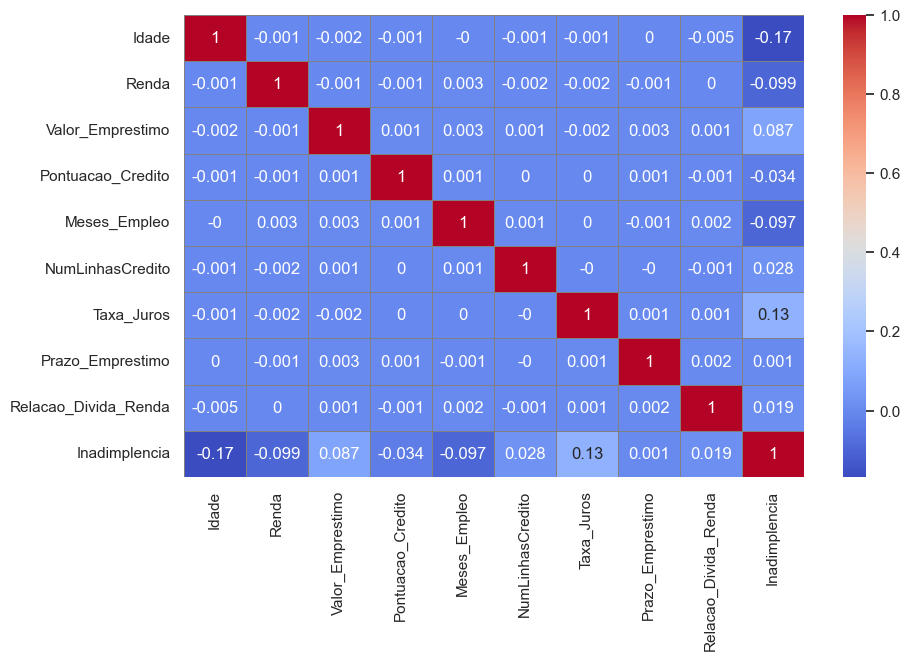

In [21]:
# Criar gráfico de mapa de calor
plt.figure(figsize=[10,6])
sns.heatmap(df_numericas.corr().round(3), cmap='coolwarm', annot=True, linewidths=0.5, linecolor='gray')
plt.show()

### Verificar poder preditivo das variáveis categóricas usando o IV

In [22]:
# Criar dataframe com variáveis categoricas e binarias
df_cat_bi = pd.concat([df_categoricas, df_binarias], axis=1)
df_cat_bi.head()

,Educacao,Tipo_Emprego,Estado_Civil,Finalidade_Emprestimo,Faixa_etaria,Faixa_salarial,Tem_Hipoteca,Tem_Dependentes,Tem_CoAssinante,Inadimplencia
0,Graduação,Integral,Divorciado,Outro,46 a 60,De 75K a 100K,Sim,Sim,Sim,0
1,Mestrado,Integral,Casado,Outro,Mais de 60,De 50K a 75K,Não,Não,Sim,0
2,Mestrado,Desempregado,Divorciado,Automóvel,46 a 60,De 75K a 100K,Sim,Sim,Não,1
3,Ensino Médio,Integral,Casado,Negócios,30 a 45,De 25K a 50K,Não,Não,Não,0
4,Graduação,Desempregado,Divorciado,Automóvel,Mais de 60,Até 25K,Não,Sim,Não,0


<Figure size 1000x1200 with 0 Axes>

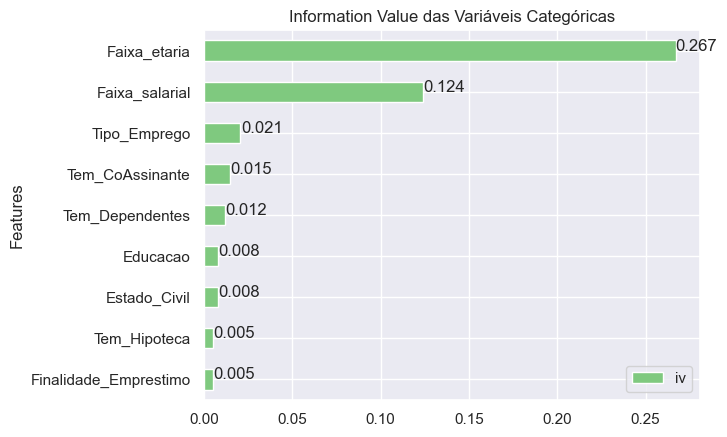

In [23]:
# Lista para o IV
iv = []

# Loop
for i in df_cat_bi.drop('Inadimplencia', axis=1).columns:
    df_woe_iv = (pd.crosstab(df_cat_bi[i], df_cat_bi['Inadimplencia'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv=lambda dfx: np.sum(dfx['woe'] * (dfx[1] - dfx[0]))))
    iv.append(df_woe_iv['iv'].iloc[0])

# Dataframe
df_iv = pd.DataFrame({'Features': df_cat_bi.drop('Inadimplencia', axis=1).columns, 'iv': iv}).set_index('Features').sort_values(by='iv')

# Plot
plt.figure(figsize=(10, 12))
df_iv.plot(kind='barh', title='Information Value das Variáveis Categóricas', colormap="Accent")
for index, value in enumerate(list(round(df_iv["iv"], 3))):
    plt.text((value), index, str(value))
plt.legend(loc="lower right")
plt.show()

### Preparar dados para criação do modelo

In [24]:
# Transformar variáveis categóricas em binária (dummie)
df_cat_bi = pd.get_dummies(df_cat_bi, drop_first=True)

# Incluir variáveis numéricas ao dataframe
df_full = pd.concat([df_cat_bi, df_numericas.drop('Inadimplencia',axis=1)], axis=1) # Evitar ter duas variáveis de inadimplência

# Informações do dataframe
display(df_full.head())
display(df_full.info())

,Inadimplencia,Educacao_Ensino Médio,Educacao_Graduação,Educacao_Mestrado,Tipo_Emprego_Desempregado,Tipo_Emprego_Integral,Tipo_Emprego_Meio Período,Estado_Civil_Divorciado,Estado_Civil_Solteiro,Finalidade_Emprestimo_Educação,...,Tem_CoAssinante_Sim,Idade,Renda,Valor_Emprestimo,Pontuacao_Credito,Meses_Empleo,NumLinhasCredito,Taxa_Juros,Prazo_Emprestimo,Relacao_Divida_Renda
0,0,False,True,False,False,True,False,True,False,False,...,True,56,85994,50587,520,80,4,15.23,36,0.44
1,0,False,False,True,False,True,False,False,False,False,...,True,69,50432,124440,458,15,1,4.81,60,0.68
2,1,False,False,True,True,False,False,True,False,False,...,False,46,84208,129188,451,26,3,21.17,24,0.31
3,0,True,False,False,False,True,False,False,False,False,...,False,32,31713,44799,743,0,3,7.07,24,0.23
4,0,False,True,False,True,False,False,True,False,False,...,False,60,20437,9139,633,8,4,6.51,48,0.73


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Inadimplencia                   255347 non-null  int64  
 1   Educacao_Ensino Médio           255347 non-null  bool   
 2   Educacao_Graduação              255347 non-null  bool   
 3   Educacao_Mestrado               255347 non-null  bool   
 4   Tipo_Emprego_Desempregado       255347 non-null  bool   
 5   Tipo_Emprego_Integral           255347 non-null  bool   
 6   Tipo_Emprego_Meio Período       255347 non-null  bool   
 7   Estado_Civil_Divorciado         255347 non-null  bool   
 8   Estado_Civil_Solteiro           255347 non-null  bool   
 9   Finalidade_Emprestimo_Educação  255347 non-null  bool   
 10  Finalidade_Emprestimo_Imóvel    255347 non-null  bool   
 11  Finalidade_Emprestimo_Negócios  255347 non-null  bool   
 12  Finalidade_Empre

None

In [25]:
# Importar bibliotecas necessárias para treinar modelo de classificação
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [26]:
# Definir variáveis explicativas (features) e variável resposta (target)
x = df_full.drop('Inadimplencia', axis=1)
y = df_full['Inadimplencia']

In [27]:
# Visualizar frequência de inadimplência positivo e negativo
y.value_counts()

Inadimplencia
0    225694
1     29653
Name: count, dtype: int64

In [28]:
# Balancear dados com a técnica smote 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1234)
x_res, y_res = smote.fit_resample(x, y)

In [29]:
# Visualizar nova frequência de inadimplência positivo e negativo
y_res.value_counts()

Inadimplencia
0    225694
1    225694
Name: count, dtype: int64

In [30]:
# Separar dados balanceados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=1234)

### Descobrir as variáveis mais relevantes para o modelo

<Axes: >

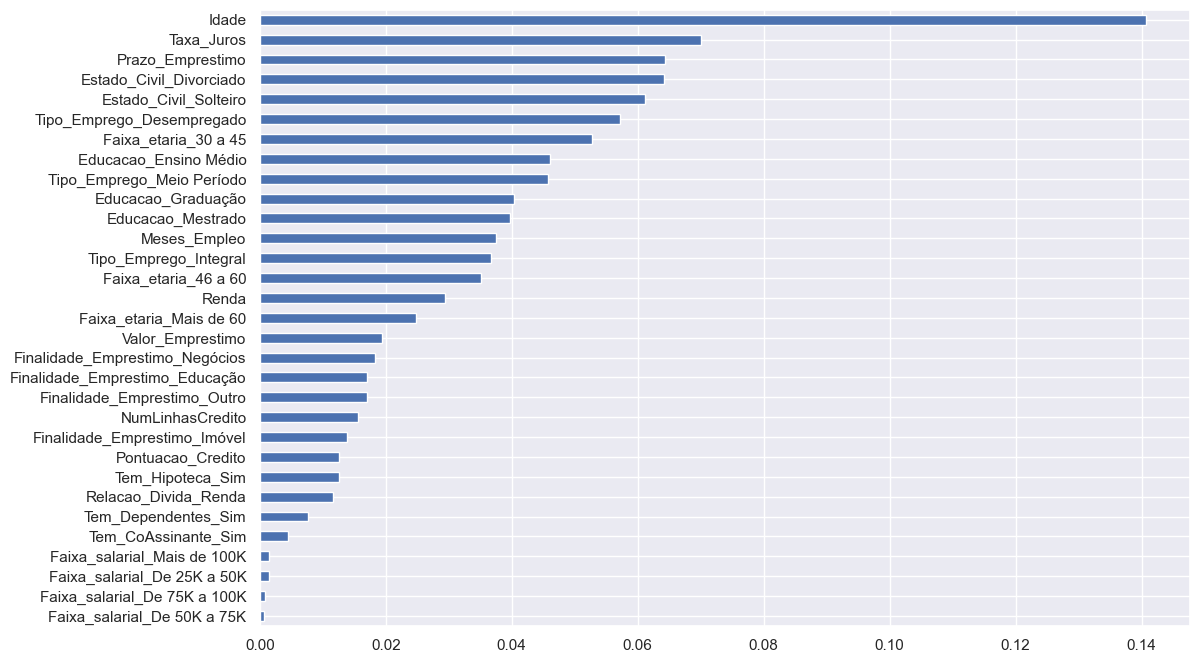

In [31]:
# Criar primeiro modelo para descobrir variáveis relevantes
modelo = RandomForestClassifier(n_estimators=100, max_depth=15)
modelo.fit(x_train, y_train)

# Array com a relevância de cada variável
importances = modelo.feature_importances_

# Criar uma série com as importâncias
feature_importances = pd.Series(importances, index=x_train.columns)

# Visualizar as importâncias
plt.figure(figsize=[12, 8])
feature_importances.sort_values(ascending=True).plot(kind='barh')

In [32]:
# Visualizar variáveis que representam 90% da importância total
limiar = feature_importances.sort_values(ascending=False).cumsum()
limiar = limiar[limiar <= 0.90].index
top_features = feature_importances.loc[limiar]
print(top_features)

Idade                             0.140639
Taxa_Juros                        0.069992
Prazo_Emprestimo                  0.064392
Estado_Civil_Divorciado           0.064172
Estado_Civil_Solteiro             0.061160
Tipo_Emprego_Desempregado         0.057172
Faixa_etaria_30 a 45              0.052724
Educacao_Ensino Médio             0.046043
Tipo_Emprego_Meio Período         0.045777
Educacao_Graduação                0.040416
Educacao_Mestrado                 0.039698
Meses_Empleo                      0.037513
Tipo_Emprego_Integral             0.036757
Faixa_etaria_46 a 60              0.035050
Renda                             0.029376
Faixa_etaria_Mais de 60           0.024766
Valor_Emprestimo                  0.019476
Finalidade_Emprestimo_Negócios    0.018318
dtype: float64


In [33]:
# Redefinir as features (x) para usar apenas as variáveis mais relevantes
x_train = x_train[top_features.index]
x_test = x_test[top_features.index]

## Modelo Regressão Logística

In [34]:
# Importar Regressão Logística e Regularização
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Regularizar features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# Criar modelo com dados balanceado
modelo_rl = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=1234)
modelo_rl.fit(x_train_scaled, y_train)

# Avaliar previsão do modelo
y_prob = modelo_rl.predict_proba(x_test_scaled)[:, 1]
threshold = 0.5  # Ajustar o threshold conforme necessário
y_pred = (y_prob > threshold).astype(int)

# Exibir métricas de avaliação
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f'AUC-ROC: {roc_auc_score(y_test, y_prob)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86     67691
           1       0.88      0.84      0.86     67726

    accuracy                           0.86    135417
   macro avg       0.86      0.86      0.86    135417
weighted avg       0.86      0.86      0.86    135417

AUC-ROC: 0.9302566835751037


In [35]:
# Usar validação cruzada para avaliar o modelo
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_rl, x_res, y_res, cv=5, scoring='f1', n_jobs=-1)

print(f'F1-score médio: {scores.mean():.4f}')
print(f'Desvio padrão: {scores.std():.4f}')

F1-score médio: 0.8461
Desvio padrão: 0.1314


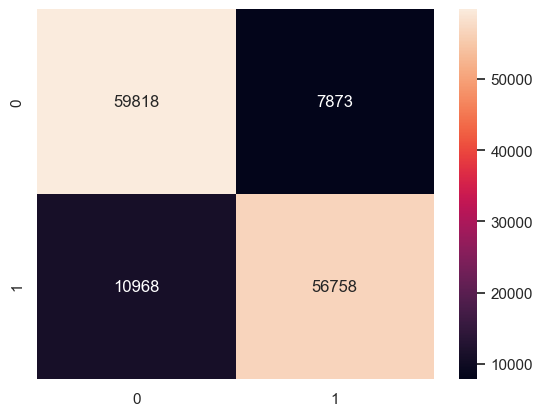

In [36]:
# Criar matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

Após balancear os dados, um modelo simples como a Regressão Logística já está fazendo boas previsões acertando quase 90% tanto dos clientes inadimplentes quanto dos não inadimplentes. 

Aumentando o threshold (valor referência), as previsões melhoram para os clientes não inadimplentes e dimuniundo o threshold a previsão para clientes inadimplentes. 

Neste caso os tomadores de decisões deveriam escolher o que melhor se alinha com as necessidades da empresa.

## Modelo RandomForest

Com uma capacidade computacional melhor é possível usar técnicas de seleção de hiperparâmetros como RandomizedSearchCV e GridSearchCV para descobrir como melhorar o modelo ao máximo.

In [37]:
# Criar modelo com dados balanceados
#modelo_rf = RandomForestClassifier(random_state=1234)

# Buscar os melhores parâmetros com RandomizedSearchCV
#from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import randint

#parametros = { 'n_estimators': randint(100, 1000), 'max_depth': randint(10, 100), 'min_samples_split': randint(2, 10) }
#busca_aleatoria = RandomizedSearchCV(estimator=modelo_rf, param_distributions=parametros, n_iter=10, cv=5, random_state=1234, n_jobs=5)
#busca_aleatoria.fit(x_train, y_train)
#melhores_parametros = busca_aleatoria.best_params_
#melhor_modelo = busca_aleatoria.best_estimator_
#score = melhor_modelo.score(x_test, y_test)

#display(melhores_parametros)
#display(melhor_modelo)
#display(score)

In [38]:
# Buscar os melhores parâmetros com GridSearchCV
#from sklearn.model_selection import GridSearchCV

#param_grid = { 'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10] }
#grid_search = GridSearchCV(modelo_rf, param_grid, cv=3, scoring='f1', n_jobs=2)
#grid_search.fit(x_train, y_train)
#melhores_parametros = grid_search.best_params_
#melhor_score = grid_search.best_score_

#display(melhores_parametros)
#display(melhor_score)

In [39]:
# Criar modelo com dados balanceados
modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=15)
modelo_rf.fit(x_train, y_train)

# Avaliar previsão do modelo
y_prob = modelo_rf.predict_proba(x_test)[:, 1]
threshold = 0.4  # Ajustar o threshold conforme necessário
y_pred = (y_prob > threshold).astype(int)

# Exibir métricas de avaliação
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f'AUC-ROC: {roc_auc_score(y_test, y_prob)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     67691
           1       0.89      0.89      0.89     67726

    accuracy                           0.89    135417
   macro avg       0.89      0.89      0.89    135417
weighted avg       0.89      0.89      0.89    135417

AUC-ROC: 0.9545655444851165


In [40]:
# Usar validação cruzada para avaliar o modelo
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_rf, x_res, y_res, cv=5, scoring='f1', n_jobs=-1)

print(f'F1-score médio: {scores.mean():.4f}')
print(f'Desvio padrão: {scores.std():.4f}')

F1-score médio: 0.8723
Desvio padrão: 0.1718


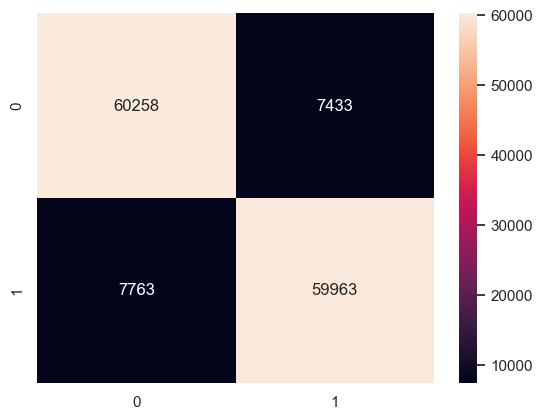

In [41]:
# Criar matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

O mesmo se aplica para o modelo Random Forest, porém este modelo tem uma precisão superior em comparação com a regressão logística.

A partir daqui irei treinar vários outros modelos e compara-los no final.

## Modelo AdaBoost

In [42]:
# Importar método AdaBoost e modelo árvore de decisão
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Criar modelo com dados balanceados
modelo_ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100)
modelo_ab.fit(x_train, y_train)

# Avaliar previsão do modelo
y_prob = modelo_ab.predict_proba(x_test)[:, 1]
threshold = 0.5  # Ajustar o threshold conforme necessário
y_pred = (y_prob > threshold).astype(int)

# Exibir métricas de avaliação
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f'AUC-ROC: {roc_auc_score(y_test, y_prob)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     67691
           1       0.90      0.87      0.88     67726

    accuracy                           0.88    135417
   macro avg       0.89      0.88      0.88    135417
weighted avg       0.89      0.88      0.88    135417

AUC-ROC: 0.9461437544974434


In [43]:
# Usar validação cruzada para avaliar o modelo
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_ab, x_res, y_res, cv=5, scoring='f1', n_jobs=-1)

print(f'F1-score médio: {scores.mean():.4f}')
print(f'Desvio padrão: {scores.std():.4f}')

F1-score médio: 0.8491
Desvio padrão: 0.1653


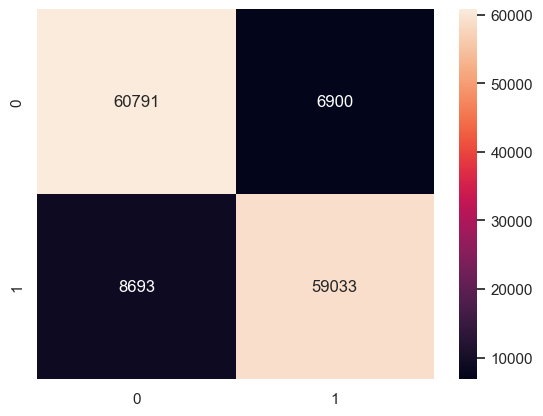

In [44]:
# Criar matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## Modelo Gradient Boosting

In [45]:
# Importar método Gadrient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Criar modelo com dados balanceados
modelo_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
modelo_gb.fit(x_train, y_train)

# Avaliar previsão do modelo
y_prob = modelo_gb.predict_proba(x_test)[:, 1]
threshold = 0.4  # Ajustar o threshold conforme necessário
y_pred = (y_prob > threshold).astype(int)

# Exibir métricas de avaliação
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f'AUC-ROC: {roc_auc_score(y_test, y_prob)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     67691
           1       0.93      0.88      0.91     67726

    accuracy                           0.91    135417
   macro avg       0.91      0.91      0.91    135417
weighted avg       0.91      0.91      0.91    135417

AUC-ROC: 0.9584971580260386


In [46]:
# Usar validação cruzada para avaliar o modelo
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_gb, x_res, y_res, cv=5, scoring='f1', n_jobs=-1)

print(f'F1-score médio: {scores.mean():.4f}')
print(f'Desvio padrão: {scores.std():.4f}')

F1-score médio: 0.8793
Desvio padrão: 0.1919


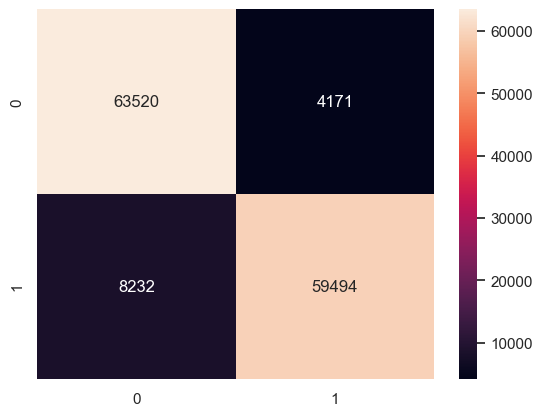

In [47]:
# Criar matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## Modelo LightGBM

In [48]:
# Importar modelo LightGBM
import lightgbm as lgb

# Criar modelo com dados balanceados
modelo_lgb = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=15)
modelo_lgb.fit(x_train, y_train)

# Avaliar previsão do modelo
y_prob = modelo_lgb.predict_proba(x_test)[:, 1]
threshold = 0.3  # Ajustar o threshold conforme necessário
y_pred = (y_prob > threshold).astype(int)

# Exibir métricas de avaliação
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f'AUC-ROC: {roc_auc_score(y_test, y_prob)}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 157968, number of negative: 158003
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 315971, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499945 -> initscore=-0.000222
[LightGBM] [Info] Start training from score -0.000222
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     67691
           1       0.91      0.90      0.90     67726

    accuracy                           0.90    135417
   macro avg       0.90      0.90      0.90    135417
weighted avg       0.90      0.90      0.90    135417

AUC-ROC: 

In [49]:
# Usar validação cruzada para avaliar o modelo
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_lgb, x_res, y_res, cv=5, scoring='f1', n_jobs=-1)

print(f'F1-score médio: {scores.mean():.4f}')
print(f'Desvio padrão: {scores.std():.4f}')

F1-score médio: 0.8879
Desvio padrão: 0.1921


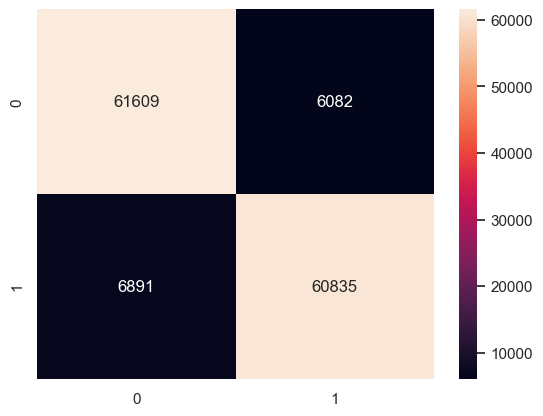

In [50]:
# Criar matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## Modelo XGBoost

In [51]:
# Importar modelo XGBoost
import xgboost as xgb

# Criar modelo com dados balanceados
modelo_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=15)
modelo_xgb.fit(x_train, y_train)

# Avaliar previsão do modelo
y_prob = modelo_xgb.predict_proba(x_test)[:, 1]
threshold = 0.3  # Ajustar o threshold conforme necessário
y_pred = (y_prob > threshold).astype(int)

# Exibir métricas de avaliação
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f'AUC-ROC: {roc_auc_score(y_test, y_prob)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     67691
           1       0.92      0.90      0.91     67726

    accuracy                           0.91    135417
   macro avg       0.91      0.91      0.91    135417
weighted avg       0.91      0.91      0.91    135417

AUC-ROC: 0.9646578216833225


In [52]:
# Usar validação cruzada para avaliar o modelo
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_xgb, x_res, y_res, cv=5, scoring='f1', n_jobs=-1)

print(f'F1-score médio: {scores.mean():.4f}')
print(f'Desvio padrão: {scores.std():.4f}')

F1-score médio: 0.8893
Desvio padrão: 0.1899


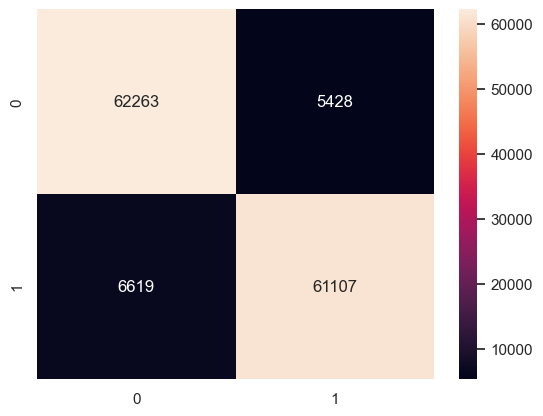

In [53]:
# Criar matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## Modelo CatBoost

In [54]:
# Importar modelo CatBoostClassifier
from catboost import CatBoostClassifier

# Criar modelo com dados balanceados
modelo_cb = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)
modelo_cb.fit(x_train, y_train)

# Avaliar previsão do modelo
y_prob = modelo_cb.predict_proba(x_test)[:, 1]
threshold = 0.3  # Ajustar o threshold conforme necessário
y_pred = (y_prob > threshold).astype(int)

# Exibir métricas de avaliação
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f'AUC-ROC: {roc_auc_score(y_test, y_prob)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     67691
           1       0.89      0.91      0.90     67726

    accuracy                           0.90    135417
   macro avg       0.90      0.90      0.90    135417
weighted avg       0.90      0.90      0.90    135417

AUC-ROC: 0.9604517556864374


In [55]:
# Usar validação cruzada para avaliar o modelo
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_cb, x_res, y_res, cv=5, scoring='f1', n_jobs=-1)

print(f'F1-score médio: {scores.mean():.4f}')
print(f'Desvio padrão: {scores.std():.4f}')

F1-score médio: 0.8887
Desvio padrão: 0.1925


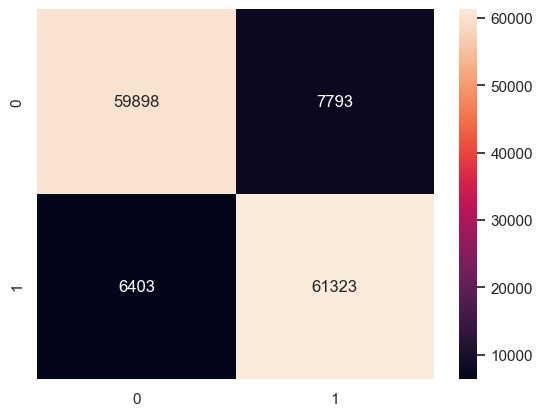

In [56]:
# Criar matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### Avaliação dos modelos criados

In [57]:
from sklearn.metrics import classification_report, roc_auc_score

# Criar dicionários com os modelos
models = {
    'Logistic Regression': modelo_rl,
    'Random Forest': modelo_rf,
    'AdaBoost': modelo_ab,
    'GradientBoosting': modelo_gb,
    'LightGBM': modelo_lgb,
    'XGBoost': modelo_xgb,
    'CatBoost': modelo_cb
}

# Criar lista para armazenar as métricas
metrics = []

# Calcular as métricas para cada modelo
for name, model in models.items():
    if name == 'Logistic Regression':
        # Para a Regressão Logística, usamos os dados normalizados
        x_train_model = x_train_scaled
        x_test_model = x_test_scaled
    else:
        # Para os outros modelos, usamos os dados originais
        x_train_model = x_train
        x_test_model = x_test
    
    # Realizando a previsão das classes
    y_prob = model.predict_proba(x_test_model)[:, 1]  # Probabilidade da classe 1
    
    # Ajustar o threshold (0.4 foi utilizado no seu código anterior)
    threshold = 0.4
    y_pred = (y_prob > threshold).astype(int)  # Converter as probabilidades em classes com threshold

    # Obter as métricas do classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extrair as métricas de interesse
    metrics.append({
        'Modelo': name,
        'Accuracy': report['accuracy'],
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score'],
        'ROC AUC': roc_auc_score(y_test, y_prob)
    })

# Criar um DataFrame a partir das métricas
metrics_df = pd.DataFrame(metrics)

# Exibir o DataFrame com as métricas
display(metrics_df)


,Modelo,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.848365,0.833032,0.871482,0.851824,0.930257
1,Random Forest,0.887784,0.889712,0.885376,0.887539,0.954566
2,AdaBoost,0.530465,0.515809,0.997948,0.680097,0.946144
3,GradientBoosting,0.908409,0.934485,0.878451,0.905602,0.958497
4,LightGBM,0.918075,0.962272,0.870316,0.913987,0.961566
5,XGBoost,0.922070,0.957333,0.883560,0.918968,0.964658
6,CatBoost,0.916037,0.952790,0.875498,0.912510,0.960452


Os modelos criados conseguiram acertar por volta de 90% das previsões. A precisão dos modelos foram validadas por meio da matriz de confusão e pela validação cruzada, além de todas estas outras métricas de avaliação.

Os modelos foram treinados com equilibrio entre as classes "inadimplente" e "não inadimplente". No entanto, isto poderia ser ajustado de acordo com a necessidade do negócio, priorizando a previsão para uma das classes em detrimento da outra.

Com um maior poder computacional os modelos poderiam ser melhorados ainda mais com técnicas de hiperparâmetrização (tuning). Entre estes modelos o escolhido poderia ser o XGBoost por sua precisão levemente superior e sua velocidade de treinamento em comparação com os outros.

### Implementação do Modelo

Uma forma de implementar o modelo é criando uma função que recebe os novos dados e o nome do modelo e então adiciona uma nova coluna 'Risco' que classifica o risco de cometer inadimplência de cada cliente.

In [58]:
# Criar função para classificar o risco do cliente
def classificar_risco(dados, modelo):
    
    # Garantir que os dados contenham apenas as colunas usadas pelo modelo
    features = modelo.feature_names_in_  
    dados_modelo = dados[features] 
    
    # Prever a probabilidade de inadimplência (probabilidade da classe 1)
    probs = modelo.predict_proba(dados_modelo)[:, 1]
    
    # Função para classificar risco com base na probabilidade
    def classificar_risco_individual(probabilidade):
        if probabilidade < 0.3:
            return 'Baixo'
        elif probabilidade < 0.5:
            return 'Médio'
        elif probabilidade < 0.7:
            return 'Alto'
        else:
            return 'Muito Alto'
    
    # Criar um DataFrame com a classificação de risco
    resultado = pd.DataFrame({'Risco': [classificar_risco_individual(prob) for prob in probs]})
    
    return resultado

In [59]:
# Criar função de preprocessamento para fazer os tratamentos necessários nos dados antes de classificar o risco de cada cliente
def preprocessar_dados(dados, modelo, top_features):
    # Salvar os dados originais para retorna-los no finaç
    dados_originais = dados.copy()
    
    # Criar coluna de faixa etária se a coluna 'Idade' estiver nas variáveis selecionadas
    if 'Idade' in dados.columns:
        bins = [0, 29, 45, 59, 100]
        labels = ['Menos de 30', '30 a 45', '46 a 60', 'Mais de 60']
        dados['Faixa_etaria'] = pd.cut(dados['Idade'], bins=bins, labels=labels)
    
    # Criar faixa salarial se a coluna 'Renda' estiver nas variáveis selecionadas
    if 'Renda' in dados.columns:
        bins = [0, 25000, 50000, 75000, 100000, 1000000]
        labels = ['Até 25K', 'De 25K a 50K', 'De 50K a 75K', 'De 75K a 100K', 'Mais de 100K']
        dados['Faixa_salarial'] = pd.cut(dados['Renda'], bins=bins, labels=labels)
    
    # Remover valores nulos 
    dados = dados.dropna()
    
    # Identificar as colunas categóricas
    colunas_categoricas = dados.select_dtypes(include=['object', 'category']).columns
    
    # Remover colunas categóricas com mais de 30 valores únicos
    colunas_categoricas_com_mais_de_30_valores = [col for col in colunas_categoricas if dados[col].nunique() > 30]
    if colunas_categoricas_com_mais_de_30_valores:
        dados = dados.drop(columns=colunas_categoricas_com_mais_de_30_valores)
    
    # Identificar colunas categóricas com 30 ou menos valores únicos
    colunas_com_poucos_valores = [col for col in colunas_categoricas if col not in colunas_categoricas_com_mais_de_30_valores]
    
    # Aplicar get_dummies apenas nas colunas com poucos valores únicos
    dados = pd.get_dummies(dados, columns=colunas_com_poucos_valores, drop_first=True)

    # Filtrar as colunas para manter apenas as variáveis definidas como relevantes (top_features)
    colunas_relevantes = [col for col in top_features.index if col in dados.columns]
    dados_filtrados = dados[colunas_relevantes]

    # Adicionar a coluna 'Risco' ao dataframe com base nas previsões do modelo
    dados_filtrados = dados_filtrados.copy()
    dados_filtrados.loc[:, 'Risco'] = classificar_risco(dados_filtrados, modelo)['Risco']

    # Restaurar os dados ao formato original (sem as colunas dummy e com todas as colunas)
    dados_originais['Risco'] = dados_filtrados['Risco'].values

    return dados_originais

In [60]:
# Usar uma amostra para simular novos dados de clientes
dados_clientes_teste = df.drop('Inadimplencia', axis=1).sample(frac=0.1, random_state=1234) 
dados_clientes_teste = dados_clientes_teste.reset_index(drop=True)

In [61]:
# Exibir "novos dados"
dados_clientes_teste.head()

,ID_Emprestimo,Idade,Renda,Valor_Emprestimo,Pontuacao_Credito,Meses_Empleo,NumLinhasCredito,Taxa_Juros,Prazo_Emprestimo,Relacao_Divida_Renda,Educacao,Tipo_Emprego,Estado_Civil,Tem_Hipoteca,Tem_Dependentes,Finalidade_Emprestimo,Tem_CoAssinante
0,DXSJ5E8VGG,19,96809,44706,618,34,4,21.93,48,0.85,Mestrado,Meio Período,Solteiro,Sim,Sim,Negócios,Não
1,NZ5VX5NR6M,44,79687,224131,809,40,2,11.95,36,0.64,Graduação,Autônomo,Divorciado,Não,Sim,Negócios,Não
2,TMDH67SYIW,57,66216,74977,385,82,4,12.72,48,0.79,Ensino Médio,Integral,Solteiro,Sim,Sim,Imóvel,Sim
3,3KI18HAU37,37,47620,21367,378,119,2,24.97,48,0.77,Mestrado,Autônomo,Casado,Não,Não,Negócios,Não
4,9BL0DNMO47,37,98140,239788,301,116,1,12.49,12,0.87,Graduação,Autônomo,Divorciado,Não,Sim,Negócios,Sim


In [62]:
# Usar a função para adicionar o risco de inadimplência nos novos dados usando o modelo_xgb e as features definidas como mais relevantes
dados_clientes_teste = preprocessar_dados(dados_clientes_teste, modelo_xgb, top_features)

In [63]:
# Exibir novos dados com a coluna Risco
dados_clientes_teste.head()

,ID_Emprestimo,Idade,Renda,Valor_Emprestimo,Pontuacao_Credito,Meses_Empleo,NumLinhasCredito,Taxa_Juros,Prazo_Emprestimo,Relacao_Divida_Renda,Educacao,Tipo_Emprego,Estado_Civil,Tem_Hipoteca,Tem_Dependentes,Finalidade_Emprestimo,Tem_CoAssinante,Risco
0,DXSJ5E8VGG,19,96809,44706,618,34,4,21.93,48,0.85,Mestrado,Meio Período,Solteiro,Sim,Sim,Negócios,Não,Médio
1,NZ5VX5NR6M,44,79687,224131,809,40,2,11.95,36,0.64,Graduação,Autônomo,Divorciado,Não,Sim,Negócios,Não,Baixo
2,TMDH67SYIW,57,66216,74977,385,82,4,12.72,48,0.79,Ensino Médio,Integral,Solteiro,Sim,Sim,Imóvel,Sim,Baixo
3,3KI18HAU37,37,47620,21367,378,119,2,24.97,48,0.77,Mestrado,Autônomo,Casado,Não,Não,Negócios,Não,Muito Alto
4,9BL0DNMO47,37,98140,239788,301,116,1,12.49,12,0.87,Graduação,Autônomo,Divorciado,Não,Sim,Negócios,Sim,Baixo


In [64]:
# Frequência de cada classificação de risco nos "novos dados"
dados_clientes_teste['Risco'].value_counts()

Risco
Baixo         22549
Médio          1762
Alto            877
Muito Alto      347
Name: count, dtype: int64

Este modelo poderia ser implementado em uma API ou até em um sistema de monitoramento para fazer previsões e ajudar na tomada de decisões, resolvendo assim um problema que traz tanto prejuízos para as empresas financeiras.

### Criar API para implementação do Modelo

Uma API foi criada usando a biblioteca FastAPI e está disponibilizada neste repositório na pasta "API". No arquivo Readme contém o passo a passo de como utiliza-la.